In [4]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv
from scipy import optimize

In [5]:
# common

def L96(Xa,F):

    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

In [2]:
def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo**2

a=2
mask = np.random.choice(10,a,replace=False)
E = np.identity(10)
E = np.delete(E,mask,axis=0)
y = np.random.randn(10*3).reshape(3,10).T
y_ = np.delete(y,mask,axis=0)
print(mask)
print(E@y-H(y,mask))
print(y_**2-H2(y,mask))

[2 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [2]:
from scipy import optimize
optimize.show_options('minimize','BFGS')

Minimization of scalar function of one or more variables using the
BFGS algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter : int
    Maximum number of iterations to perform.
gtol : float
    Gradient norm must be less than `gtol` before successful
    termination.
norm : float
    Order of norm (Inf is max, -Inf is min).
eps : float or ndarray
    If `jac` is approximated, use this value for the step size.


In [3]:
def CG(xb,*args):
    result=[xb]
    x0 = xb
    d0 = -jacobi(x0,*args)
    d1 = -d0
    i = 0
    while i<200:
        alpha = almiho(d0,x0,d1,*args)
        #alpha = golden_section(d0,x0,*args)
        x = x0 + alpha*d0
        d1 = jacobi(x,*args)
        #print(d1)
        err = np.sqrt(np.sum(d1**2))
        result.append(x)
        print("err",err)          
        if(err<0.001):
            print(i,"end")
            print(err)
            break
        p = -d1 + (np.dot(d1.T,d1)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
        i+=1
    else:
        print("!!failed to converge in CG!!")
        print(err)
    jmin = J(x,*args)
    return x,jmin#,result

In [4]:
def almiho(d0,x0,df0,*args):
    alpha=0.0001
    beta=0.5
    f1 = J(x0,*args)
    dfd = df0@d0
    print(dfd)
    l = 0
    while l<100:
        tk = beta**l
        lim = alpha*tk*dfd
        x = x0 + tk*d0
        f2 = J(x,*args)
        print("f2-f1",f2-f1,"lim",lim)
        if(f2-f1<=lim):
            print("end",tk)
            break
        l+=1
    else:
        print("!!failed to converge in almiho!!",tk)
    return tk

In [5]:
def golden_section(d0,x0,*args):
    t = (1.0+np.sqrt(5.0))/2.0 # golden_ratio
    a1=-10.0
    a3=10.0
    a2=(t*a1+a3)/(1+t)
    a4=a1-a2+a3
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(100):
        num+=1
        x1 = x0 + a2*d0
        f2 = J(x1,*args)
        x2 = x0 + a4*d0
        f4 = J(x2,*args)
        if(f4>f2):
            a3=a1
            a1=a4
        else:
            a1=a2
            a2=a4
        if(abs(a3-a1)<0.0001):
            xa = x0 + a1*d0
            f = J(xa,*args)
            print(num,"end",a1)
            break
        a4=a1-a2+a3
        #print(num,a,b,c1,c2,abs(b-a))
    return a1

end 0.03125
end 0.125
end 3.469446951953614e-18
end 2.7755575615628914e-17
end 0.00390625
end 0.015625
end 0.03125
end 0.03125
end 0.015625
end 0.0625
end 5.551115123125783e-17
end 0.015625
end 0.03125
end 5.551115123125783e-17
end 0.015625
end 0.015625
end 0.0625
end 0.015625
end 0.015625
end 0.03125
end 1.4210854715202004e-14
end 0.015625
end 0.0625
end 1.7763568394002505e-15
end 0.015625
end 0.0625
end 7.105427357601002e-15
end 0.015625
end 0.03125
end 1.1368683772161603e-13
end 0.015625
30 end
0.0009849071406023149


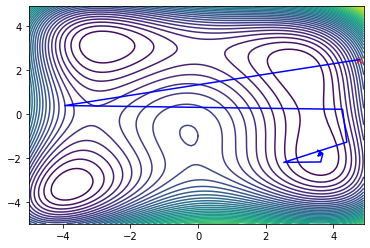

In [5]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01

def J(x,*args):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[J(np.stack([x,y],axis=0)) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

def jacobi(x,*args):
    dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
    dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22
    return np.array([dx,dy])

start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

x,jmin,resultc=CG(start,None)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

optX=[x[0] for x in resultc]
optY=[x[1] for x in resultc]
plt.plot(optX,optY,"-b");

plt.show()

## MLEF

In [44]:
def Forecast(Xac,Xa,m,b,h,F):
    #h = 0.05 
    #F = 8.0
    
    #control
    Xfc = Rungekutta4(Xac,h,F)
    
    #ensemble
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    
    #Pf^(1/2)
    dXf = Xf - Xfc.reshape(-1,1)
    dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T
    #Pf = Pf*L
    
    return Xfc,Xf,Pf,dXf

def Analysis(Xfc,Xf,dXf,y,m,N,a,mask):
    #N = 40
    p = N-a
    R = np.eye(p)
    I = np.eye(m)
    
    R_inv = np.linalg.inv(R)
    R_sqrt = np.sqrt(R_inv)
    z = R_sqrt@H(Xf,mask) - R_sqrt@H(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C = z.T@z
    #print(C)
    
    la,v = np.linalg.eigh(C)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C)^(-T/2)
    
    zeta0 = np.zeros(m)
    args = (Xfc,dXf,A,y,R_inv,mask,H)
    res = optimize.minimize(J, zeta0, args=args, method='BFGS', jac=jacobi, options={'gtol':1e-6, 'disp':True})
    zeta = res.x
    jmin = res.fun
    #Pa_ = res.hess_inv #(I+C)^(-T/2)?
    #zeta,jmin = CG(zeta0,*args)
    Xac = Xfc + dXf@A@zeta
    
    Xf = Xac.reshape(-1,1)+dXf
    z_opt = R_sqrt@H(Xf,mask)- R_sqrt@H(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z_opt = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C_opt = z_opt.T@z_opt
    
    la,v = np.linalg.eigh(C_opt)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C_opt)^(-T/2)
    #print(A)
    
    dXa = dXf@A #Pf^(1/2)(I+C_opt)^(-T/2)
    
    Xa = np.zeros((N,m))
    Xa = dXa + Xac.reshape(-1,1)
    Pa = dXa@dXa.T
    
    return Xa,Pa,Xac,jmin

def J(zeta,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    B = A.T@A #(I+C)^(-1)
     
    x = xb + dXf@A@zeta
    inv = y - H_obs(x,mask)   
    return (zeta.T@B@zeta + inv.T@R_inv@inv)/2

def jacobi(zeta,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    B = A.T@A #(I+C)^(-1)
    R_sqrt = np.sqrt(R_inv)
    
    x = xb + dXf@A@zeta
    z = R_sqrt@H_obs(x.reshape(-1,1)+dXf,mask) - R_sqrt@H_obs(x,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    inv = y - H_obs(x,mask)
    djo = A.T@z.T@R_sqrt@inv
    return B@zeta - djo

def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return np.sqrt(xo**2)

         Current function value: 103.546619
         Iterations: 7
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: 90.146327
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 111.768569
         Iterations: 6
         Function evaluations: 67
         Gradient evaluations: 55
         Current function value: 101.230074
         Iterations: 9
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 97.317945
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 110.825109
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 100.419058
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Curre

         Current function value: 61.024301
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 53.030164
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 61.316875
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 55.258314
         Iterations: 3
         Function evaluations: 69
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 83.982802
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 112.050322
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 100.152763
 

         Current function value: 33.830242
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 47.250250
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 30.913445
         Iterations: 4
         Function evaluations: 50
         Gradient evaluations: 43
         Current function value: 25.404986
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 28.902719
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 35.933844
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 32.601798
         Iterations: 3
         Function eval

         Current function value: 22.182594
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 22.073272
         Iterations: 5
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 23.747631
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 28.101923
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 17.203380
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 23.688975
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 18.304742
         Iterations: 2
         Function eval

         Current function value: 15.163088
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 17.793828
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 14.389204
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.260105
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 14.242020
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 27.156499
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.283899
         Iterations: 3
         Function evaluations: 93
         Gradient evalu

         Current function value: 16.212309
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 29.040689
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 18.501937
         Iterations: 3
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 23.425162
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.342850
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 12.747347
         Iterations: 3
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 14.310270
         Iterations: 2
         Function evaluations: 100
         Gradient eval

         Current function value: 17.811068
         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 20.767828
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 26.037702
         Iterations: 2
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 19.073975
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 28.356268
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 21.010938
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 19.338107
         Iterations: 3
         Function evaluations: 74
         Gradient evaluations: 62
         Current functio

         Current function value: 20.565842
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.618732
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 24.091768
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.389985
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 32.558435
         Iterations: 6
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 25.721007
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.344991
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 17.240592
         Iteration

Optimization terminated successfully.
         Current function value: 19.128282
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.838761
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 13.192527
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 25.570874
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 14.040685
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 24.721749
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 27.056807
       

         Current function value: 11.329913
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 13.537656
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 19.389437
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 10.309812
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 18.653562
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 24.928747
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 23.755439
         Iterations: 4
         Function evaluations: 5
         Gradient ev

Optimization terminated successfully.
         Current function value: 18.973108
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 20.428970
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 14.984296
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 23.620924
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 23.144239
         Iterations: 3
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 19.527381
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 17.711967
         Iterations: 4
         Function evaluations: 5
         Gradient eva

         Current function value: 18.844930
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 27.685372
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 18.083873
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 11.581804
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.141784
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 13.081388
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 20.153308
       

         Current function value: 17.948308
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 22.942245
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.920277
         Iterations: 3
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 28.421602
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 26.591647
         Iterations: 3
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 14.626730
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.608245
         Iterations: 4
         Functio

         Current function value: 19.943250
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 15.078923
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.668143
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 20.553442
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 28.589270
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.833475
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 28.463844
        

Optimization terminated successfully.
         Current function value: 20.904081
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.412345
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 25.684342
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 21.060776
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.682795
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.264137
         Iterations: 4
         Function evaluations: 5
         

         Current function value: 18.395947
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 12.359221
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.713366
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 25.417075
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 18.095977
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 19.146671
         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 13.436706
    

         Current function value: 22.336496
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 18.059966
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 19.615421
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 21.169112
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 27.888616
         Iterations: 4
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 18.262500
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 19.094963
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated s

Optimization terminated successfully.
         Current function value: 17.792133
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.832386
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 29.468003
         Iterations: 5
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 13.661151
         Iterations: 2
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 25.394272
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 18.281958
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.274626
         Iterations: 6
         Function evaluations: 83
         Gradient eval

Optimization terminated successfully.
         Current function value: 12.028087
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.453267
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 18.986128
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 24.060376
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 17.395147
         Iterations: 8
         Function evaluations: 70
         Gradient evaluations: 58
         Current function value: 26.760756
         Iterations: 2
         Function evaluations: 67
         Gradient evaluations: 56
         Current function value: 21.013391
         Iterations: 3
         Function eval

         Current function value: 11.700253
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 20.502044
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.811050
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 13.093852
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.781058
         Iterations: 3
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 18.690345
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 21.398888
         Iterations: 5
         Function evaluations: 86
         Gradient evalu

         Current function value: 21.238919
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 14.311437
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 19.395316
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 21.429542
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 22.998056
         Iterations: 8
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 21.483571
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.231212
         Iterations: 2
         Function evaluations: 46
         Gradient evaluations: 35
         Current function value: 16.253333
         Iterat

         Current function value: 20.000078
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 22.197731
         Iterations: 3
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 21.602019
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 22.566282
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.359073
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 24.546953
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 9.253195
         Iterations: 3
         Function eval

         Current function value: 16.434967
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.042577
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 22.107466
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 16.467924
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 28.289182
         Iterations: 2
         Function evaluations: 51
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 17.858067
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 18.094875
         Iterations: 2
         Function evaluations: 99
         Gradient eva

         Current function value: 12.612659
         Iterations: 3
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 25.491454
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 16.995933
         Iterations: 4
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 19.958283
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 14.229083
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.803465
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 25.906579
         Iterations: 7
         Function ev

Optimization terminated successfully.
         Current function value: 24.721165
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.460321
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 24.010753
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 23.713421
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 13.654819
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 17.057602
         Iterations: 5
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: 16.430988
         Iterations: 2
         Function evaluations: 64
         Gradient evaluations: 54
         Current function

         Current function value: 15.352814
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 21.294502
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.292979
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.824578
         Iterations: 2
         Function evaluations: 48
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 25.835054
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 23.462572
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.746023
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current functio

         Current function value: 19.991753
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 20.264614
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.205413
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 20.791948
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 25.105213
         Iterations: 3
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 24.343832
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 18.306453
         Iterations: 4
         Function evaluations: 110
         Gradient evalu

         Current function value: 16.489413
         Iterations: 3
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 28.350854
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.978262
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 28.566549
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 60
Optimization terminated successfully.
         Current function value: 24.209208
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.690823
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
         Current function value: 23.763521
         

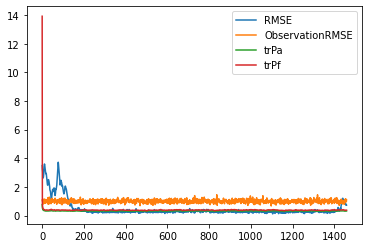

rmse 0.2883444152677557
trPa 0.31435670196329063
trPf 0.3795013125459107
<Jmin> 24.665125836309066


In [14]:

t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0

#初期値
X0 = np.random.rand(N)
for j in range(500):
    X1 = Rungekutta4(X0,h,F)
    X0 = X1
Xac = X1

Xa = np.empty((N,m))
Xc = np.random.rand(N,m)*5.0
Xa = Xac.reshape(-1,1) + Xc
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data2.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
Jmin = []
a = 0 # observation miss
b = 1.1 # inflation
trPa = []
trPf = []
R = []
Rf = []
R_ = []
RO = []
for k in range(t):
    mask = np.random.choice(40,a,replace=False)
    y_ =np.delete(Y[k],mask)
    
    (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b,h,F)
    (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,N,a,mask)
    #print(Xf)
    Jmin.append(jmin)
    
    rmse=np.zeros(m)
    rmsef = np.zeros(m)
    rmse_=0.0
    X1 = Xt[k]
    rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
    rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
    rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
    Y1 = y_
    #X1 = H(Xt[k],mask)
    X1 = H2(Xt[k],mask)
    rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
    err = np.sqrt(np.sum(np.diag(Pa))/N)
    err2 = np.sqrt(np.sum(np.diag(Pf))/N)
    trPa.append(abs(err))
    trPf.append(abs(err2))
    R.append(rmse)
    Rf.append(rmsef)
    R_.append(rmse_)
    RO.append(rmseo)
    #if(k%100==0):
    #   print(k)
rb = np.sum(np.array(R_[500:]))/(t-500)
trPab = np.sum(np.array(trPa[500:]))/(t-500)
trPfb = np.sum(np.array(trPf[500:]))/(t-500)
RMSE.append(rb)
TrPa.append(trPab)
TrPf.append(trPfb)
#plt.ylim([0.0,4.0])
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("MLEF_obs2.png")
plt.show()
print("rmse",np.mean(R_[500:]))
print("trPa",np.mean(trPa[500:]))
print("trPf",np.mean(trPf[500:]))
print("<Jmin>",np.mean(np.array(Jmin)))

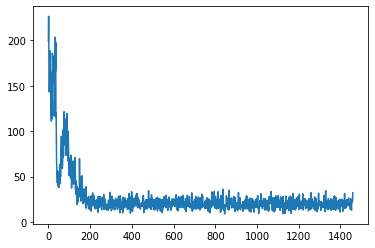

In [14]:
plt.plot(Jmin)

In [45]:
# 観測欠損実験
t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0

dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
Jmin = []
trPa = []
trPf = []
R = []
Rf = []
R_ = []
RO = []
for i in range(0,21,5):
    a = i # observation miss
    for j in range(1):
        b = 1.1 # inflation
        #初期値
        X0 = np.random.rand(N)
        for k in range(500):
            X1 = Rungekutta4(X0,h,F)
            X0 = X1
        Xac = X1

        Xa = np.empty((N,m))
        Xc = np.random.rand(N,m)*5.0
        Xa = Xac.reshape(-1,1) + Xc
        #plt.plot(Xa[:,9])
        #plt.plot(Xa[:,8])
        #plt.show()

        for k in range(t):
            mask = np.random.choice(40,a,replace=False)
            y_ =np.delete(Y[k],mask)
    
            (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b,h,F)
            (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,N,a,mask)
            #print(Xf)
            Jmin.append(jmin)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0.0
            X1 = Xt[k]
            rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
            rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
            rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
            Y1 = y_
            X1 = H(Xt[k],mask)
            #X1 = H2(Xt[k],mask)
            #X1 = H3(Xt[k],mask)
            rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
            #   print(k)
        rb = np.mean(np.array(R_[500:]))
        trPab = np.mean(np.array(trPa[500:]))
        trPfb = np.mean(np.array(trPf[500:]))
        RMSE.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        B.append(b)
    A.append(a)
    print("rmse",np.mean(R_[500:]))
    print("trPa",np.mean(trPa[500:]))
    print("trPf",np.mean(trPf[500:]))
    print("<Jmin>",np.mean(np.array(Jmin)))

Optimization terminated successfully.
         Current function value: 278.808401
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 248.220044
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 198.528584
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 171.954004
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 169.147889
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 115.585327
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 15.391903
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.419723
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.395878
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.151054
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.723071
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.620901
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 22.733590
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.386058
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.047870
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.271927
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.860259
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.897531
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 21.903363
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.472178
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.044800
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.112874
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.760125
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.385911
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 17.949446
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.572047
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.139766
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 30.621356
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.151027
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.448214
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 19.935807
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.755753
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.399217
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.350564
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.175440
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.889966
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 29.137951
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.441059
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.518844
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.068750
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.864950
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.520135
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 22.878173
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.127101
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.982828
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.465047
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.020223
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.981699
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 21.700732
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.114074
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.315879
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.572735
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.120512
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.052133
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 15.333983
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.350003
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.260043
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.627923
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.451475
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.006051
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.148255
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 27.441602
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.196656
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.319115
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.409434
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.895748
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 23.183079
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.565984
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.514193
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.089219
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.715411
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.788328
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 20.261155
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.433852
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.280078
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.052772
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.593504
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.195373
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.069442
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.854802
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.515104
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.737484
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.542763
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.371286
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.429415
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.046662
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.313598
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.757252
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.658428
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.576206
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 16.012727
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.885535
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.131367
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.887373
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.119892
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.129405
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 19.991544
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.683347
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.648917
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.691074
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.663093
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.894337
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 13.067161
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.527222
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.966371
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.088828
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.363143
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.556887
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.141967
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.108786
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.536248
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.003579
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.031597
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.327964
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.136511
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.279489
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.082192
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.711221
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.603212
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.220751
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 11.804727
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.672182
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.205397
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.984206
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.272373
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.965253
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 14.882573
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.941810
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.544286
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.722826
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.454861
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.869770
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 17.627494
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.798105
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.856631
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.802874
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.127315
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.115480
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 15.308108
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.195819
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.102096
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.698957
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.810476
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.183231
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 21.237998
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.738568
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.888049
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.452623
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.707597
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.422994
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.754371
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.001489
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.936941
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.992904
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.191840
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.970769
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 54.591180
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 42.480878
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 40.585154
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 47.366696
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 32.579612
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 44.348320
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 12.694930
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.308862
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.031611
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.429705
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.537830
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.179433
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 14.266379
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.202600
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.079990
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.678611
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.494821
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.878124
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 8.189720
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.271692
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.098332
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.303592
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.101900
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.633026
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 13.476840
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.452001
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.065583
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.043695
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.424960
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.056488
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 15.360786
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.961482
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.440718
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.942347
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.296954
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.635368
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 23.330951
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.968452
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.600008
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.427134
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.843579
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.732880
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 19.047464
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.122477
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.412929
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.927743
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.966584
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.180588
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.749404
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.655028
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.529457
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.017265
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.618703
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.284629
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 16.879397
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.264208
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.216196
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.895059
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.690558
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.258511
         Iterations: 4
         Function evaluations: 5
         Grad

         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.452194
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.346051
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.366231
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.575187
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.632959
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.705400
   

Optimization terminated successfully.
         Current function value: 17.326967
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.918848
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.446591
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.887567
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.770846
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.297981
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 11.938973
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.611903
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.591054
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.420488
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.674551
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.867417
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 16.585939
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.484815
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.849376
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.991111
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.746902
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.512499
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 25.100209
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.147298
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.866936
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.631798
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.876579
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.232051
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 14.612546
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.741480
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.692043
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.012893
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.642080
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.394281
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 13.594721
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.301985
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.412582
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.373316
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.216898
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.868866
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 17.022955
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.681552
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.918392
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.062427
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.015797
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.554030
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 15.454546
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.095456
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.576756
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.433861
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.394760
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.023772
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 18.608456
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.759177
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.923213
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.718996
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.003251
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.265430
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 26.021621
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.527443
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.595887
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.248122
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.511200
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.687003
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 22.810033
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.449931
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.591668
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.107174
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.993977
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.826021
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 17.890172
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.931082
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.365923
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.317560
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.976622
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.199697
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 11.538894
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.915965
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.696027
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.585519
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.642721
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.415595
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.502197
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.880144
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.257458
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.431170
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.047522
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.390243
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 15.851169
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.265220
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.020694
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.796815
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.934790
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.543725
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 16.069828
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.708345
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.126442
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.273746
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.636483
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.639429
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 21.104489
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 29.536645
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 31.538833
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 28.038089
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.268487
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.754979
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 19.011903
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.039005
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.794433
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.944965
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.366526
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.151855
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 21.920488
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.694622
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.290341
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.885330
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.342518
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.845788
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 17.214250
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.213517
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.029848
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.369107
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.228999
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.559347
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.497277
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.556888
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.492747
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.195866
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.400347
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.540139
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 12.451775
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.047187
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.302762
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.028228
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.866434
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.758153
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 14.780634
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.202503
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.141393
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.970587
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.791042
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.041661
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 21.792565
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.310401
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.450225
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.653182
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 7.489436
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.918780
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 14.405579
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.934640
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.358257
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.504111
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.877473
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.911183
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 11.248716
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.608391
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.827772
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.826761
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.621587
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 8.738847
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 13.579681
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.023485
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.593717
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.572942
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.965667
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.263888
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 13.166031
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.544725
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.120371
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.953762
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.593484
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.248272
         Iterations: 4
         Function evaluations: 5
         Gradie

Optimization terminated successfully.
         Current function value: 12.651891
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.958978
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.074892
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.448389
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.761763
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.407143
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 16.548070
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.905151
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.239975
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.091031
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.734482
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.478465
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.330268
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.108200
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.890293
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.190971
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.199372
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.051703
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 12.573859
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.621534
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.728025
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.105380
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.976601
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.150248
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.935294
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.396359
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.091995
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.318482
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.955306
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.935375
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 17.804594
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.085936
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.915966
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.770058
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.750610
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.146986
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.322349
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.402915
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.350587
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.905740
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.537155
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.997188
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 12.713460
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.568702
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.832692
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.847906
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.868395
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.318259
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 15.754722
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.198099
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.381068
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.185961
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.448386
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.622198
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 16.906248
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.755160
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.583111
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.366547
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.580434
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.335300
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 70.012929
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 138.554725
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 105.791658
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 78.984271
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 150.859788
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 85.182705
         Iterations: 5
         Function evaluations: 6
         G

Optimization terminated successfully.
         Current function value: 83.294891
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 85.065793
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 109.091800
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 98.346114
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 97.963709
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 156.165533
         Iterations: 5
         Function evaluations: 6
         Gr

Optimization terminated successfully.
         Current function value: 37.678383
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.454294
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.487765
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 45.288317
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 33.199821
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.468794
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.074232
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.423791
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.116146
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.329263
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.961318
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.829809
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 10.769541
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.419843
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.667937
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.238789
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.563038
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.432654
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 9.149043
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.732499
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.126909
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.821472
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.239008
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.895790
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 13.428840
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 6.726653
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.707573
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.961061
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 8.404764
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.696290
         Iterations: 4
         Function evaluations: 5
         Gradient 

Optimization terminated successfully.
         Current function value: 9.549867
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.545563
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.988342
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.652328
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.688976
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 8.976461
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 10.056132
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.823465
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 6.996676
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.232302
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.990529
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.492587
         Iterations: 4
         Function evaluations: 5
         Gradien

Optimization terminated successfully.
         Current function value: 16.209272
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.674128
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.111742
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.620291
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.405101
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.370253
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 14.441897
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.361396
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.757758
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.528418
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.211711
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 4.061374
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 11.587944
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.566084
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.613934
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.600145
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.990274
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.864352
         Iterations: 4
         Function evaluations: 5
         Gradie

Optimization terminated successfully.
         Current function value: 13.519465
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.211319
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.035272
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.387801
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.456892
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 5.311315
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 10.772082
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.737967
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.960736
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.226891
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.131521
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.947765
         Iterations: 4
         Function evaluations: 5
         Gradie

Optimization terminated successfully.
         Current function value: 9.854887
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.126744
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.624270
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.583943
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.251574
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.074250
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 13.369980
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.687149
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.372081
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.701795
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.612723
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 5.728138
         Iterations: 4
         Function evaluations: 5
         Gradie

Optimization terminated successfully.
         Current function value: 14.574837
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.963433
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.732849
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.194965
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.615498
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.473672
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 13.235960
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.959952
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.581141
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.484697
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.751207
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.076714
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 8.836125
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.548526
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.409334
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.159199
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.521633
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.991574
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 12.295172
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.836684
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.677168
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.224302
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 8.125195
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.510737
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 7.249207
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.064456
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.004964
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.068822
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.676231
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.199002
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 7.191074
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.663022
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.997706
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.040492
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.450311
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.078805
         Iterations: 4
         Function evaluations: 5
         Gradient

Optimization terminated successfully.
         Current function value: 5.934949
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.767480
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.716092
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.074237
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.795970
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.020764
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 12.621863
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.313531
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.793270
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.824407
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.571384
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.114645
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 13.931929
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.619472
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.559939
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.170810
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.278947
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.457720
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 12.240191
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.942784
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.086195
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.907013
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.964103
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.086505
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 15.246739
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.861433
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.942805
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.703225
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.035844
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.369146
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 6.655882
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.016488
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.437892
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.565905
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.070117
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.928272
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 14.366885
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.444680
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.291826
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.130642
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.976320
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.550108
         Iterations: 4
         Function evaluations: 5
         Gradi

Optimization terminated successfully.
         Current function value: 115.357367
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 125.845352
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 213.272259
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 113.150673
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 114.396842
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 150.099986
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 27.717008
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 35.447582
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 59.021149
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.089646
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 55.144484
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 56.262720
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 49.252807
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 79.629282
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 85.819520
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 104.378632
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 133.049824
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 152.181593
         Iterations: 5
         Function evaluations: 6
         G

Optimization terminated successfully.
         Current function value: 42.276351
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 67.863113
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 63.339087
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 54.485437
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.264875
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 39.514001
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.517402
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.117449
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.958151
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 32.789173
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.909821
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.285423
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 10.853623
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.375815
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.472690
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 8.421526
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.495553
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.282056
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 13.699787
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.103858
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.389723
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.997500
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.048173
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.697436
         Iterations: 4
         Function evaluations: 5
         Gradient

Optimization terminated successfully.
         Current function value: 8.469179
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 4.889537
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 5.848427
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.289286
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 6.549495
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 4.475851
         Iterations: 5
         Function evaluations: 6
         Gradient e

Optimization terminated successfully.
         Current function value: 6.057437
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 4.443642
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 5.898798
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.776100
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.530493
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.684525
         Iterations: 5
         Function evaluations: 6
         Gradient 

Optimization terminated successfully.
         Current function value: 9.838348
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.552381
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.331894
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 8.153418
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.468043
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.004760
         Iterations: 5
         Function evaluations: 6
         Gradient

Optimization terminated successfully.
         Current function value: 6.548416
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.792285
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.492464
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.751250
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.753679
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.465914
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 14.663700
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.015514
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.179487
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.271726
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.796627
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.198940
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 8.881423
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.311467
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.104381
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.142347
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.976750
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.729126
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 13.010577
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.617528
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.147412
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.483969
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.200509
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.899424
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 10.071786
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.461578
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.020895
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.235272
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.036795
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.872078
         Iterations: 5
         Function evaluations: 6
         Gradient

Optimization terminated successfully.
         Current function value: 15.281946
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.910515
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.176278
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.473798
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.557702
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.466107
         Iterations: 4
         Function evaluations: 5
         Gradie

Optimization terminated successfully.
         Current function value: 11.304140
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.679106
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.108765
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.458251
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.655366
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.729745
         Iterations: 5
         Function evaluations: 6
         Gradien

Optimization terminated successfully.
         Current function value: 8.092379
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.274424
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.154335
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.041393
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.214806
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.894220
         Iterations: 4
         Function evaluations: 5
         Gradient e

Optimization terminated successfully.
         Current function value: 10.577959
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.189903
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.515485
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.945346
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.152559
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.093700
         Iterations: 5
         Function evaluations: 6
         Gradient

Optimization terminated successfully.
         Current function value: 15.350096
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.561100
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 9.528271
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.224821
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.628710
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.766563
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 12.626060
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.257957
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.059443
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.401072
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.114253
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.271189
         Iterations: 5
         Function evaluations: 6
         Gradie

Optimization terminated successfully.
         Current function value: 9.274425
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.148627
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.990405
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.875732
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.687011
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.562478
         Iterations: 5
         Function evaluations: 6
         Gradient

Optimization terminated successfully.
         Current function value: 4.021117
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 8.896194
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.943358
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.683033
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 5.428144
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.666739
         Iterations: 5
         Function evaluations: 6
         Gradient 

Optimization terminated successfully.
         Current function value: 10.566998
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.671998
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.030751
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.969264
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.119677
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.726117
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 5.542928
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.125461
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 11.691770
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.519071
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.287938
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.878503
         Iterations: 5
         Function evaluations: 6
         Gradient

Optimization terminated successfully.
         Current function value: 9.653914
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 4.558234
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.492827
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 4.003853
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 5.294000
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.667972
         Iterations: 4
         Function evaluations: 5
         Gradient

Optimization terminated successfully.
         Current function value: 8.236547
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.581300
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.990867
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.464216
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.699025
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 6.018484
         Iterations: 5
         Function evaluations: 6
         Gradient 

Optimization terminated successfully.
         Current function value: 11.060574
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.164297
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.566707
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 9.554683
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.495365
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.546928
         Iterations: 5
         Function evaluations: 6
         Gradi

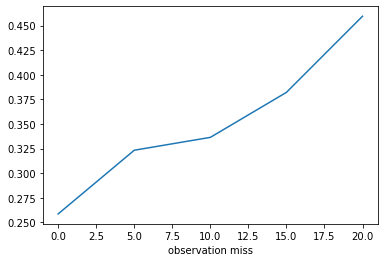

In [48]:
plt.plot(A,RMSE)
plt.xlabel("observation miss")
plt.savefig("MLEF_obsmiss1.png")
plt.show()

In [49]:
# メンバー数実験
t = 1460
N = 40
h = 0.05 
F = 8.0
dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []

for m in [40,20,15,10,8]:
    for i in range(1):
        b = 1.1 # inflation
    
        #初期値
        X0 = np.random.rand(N)
        for j in range(500):
            X1 = Rungekutta4(X0,h,F)
            X0 = X1
        Xac = X1

        Xa = np.empty((N,m))
        Xc = np.random.rand(N,m)*5.0
        Xa = Xac.reshape(-1,1) + Xc
        #plt.plot(Xa[:,9])
        #plt.plot(Xa[:,8])
        #plt.show()

        Jmin = []
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        a = 0 # observation miss
        for k in range(t):
            mask = np.random.choice(40,a,replace=False)
            y_ =np.delete(Y[k],mask)
    
            (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b,h,F)
            (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,N,a,mask)
            #print(Xf)
            Jmin.append(jmin)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0.0
            X1 = Xt[k]
            rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
            rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
            rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
            Y1 = y_
            X1 = H(Xt[k],mask)
            #X1 = H2(Xt[k],mask)
            #X1 = H3(Xt[k],mask)
            rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
            #   print(k)
        rb = np.mean(np.array(R_[500:]))
        trPab = np.mean(np.array(trPa[500:]))
        trPfb = np.mean(np.array(trPf[500:]))
        RMSE.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        B.append(b)
    A.append(m)
    print("rmse",np.mean(R_[500:]))
    print("trPa",np.mean(trPa[500:]))
    print("trPf",np.mean(trPf[500:]))
    print("<Jmin>",np.mean(np.array(Jmin)))

Optimization terminated successfully.
         Current function value: 23.679905
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 33.236552
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.164788
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 32.890860
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 27.429156
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.470489
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 12.450821
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.693580
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.842019
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.596486
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.684999
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.141824
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.837679
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.001874
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.543499
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.111311
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.313454
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.921413
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 14.947953
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.872170
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.027167
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.260098
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.370916
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.788013
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.178180
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.971151
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.070516
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.311086
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.972742
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.125770
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 22.006461
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.064528
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.984327
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.974239
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.445222
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.778219
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 13.652702
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.965825
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.891950
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.972121
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.255523
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.731404
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 23.815323
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 31.734061
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.896629
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.050823
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.307059
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.213242
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.594899
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.126644
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.396800
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.315149
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.855449
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.759856
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 16.566826
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.280154
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 29.034288
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.286436
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.471310
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.870670
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 24.651644
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.592749
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.543554
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.465865
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.938632
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.720264
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 21.343295
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.161758
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.661851
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 7.818795
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.275339
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.517300
         Iterations: 5
         Function evaluations: 6
         Gradi

Optimization terminated successfully.
         Current function value: 20.834304
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.467676
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.178761
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.797905
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.702078
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.625546
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 23.973770
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.161761
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.733467
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.289229
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.807701
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.108330
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 17.533090
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.818599
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 32.090799
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.668230
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.496071
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.949442
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 27.126312
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.594268
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.394169
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.751574
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.058649
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.886168
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 23.065285
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.052156
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.849805
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.878380
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.010832
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.197152
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 269.386924
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 258.030546
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 264.827611
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 221.033666
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 259.028972
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 246.173770
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 43.524057
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 42.788776
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 35.796658
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 38.422413
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 29.510287
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 29.203598
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 26.433939
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.192842
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.100484
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.482050
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.127785
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.131255
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 17.418587
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.442502
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.347771
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.344515
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.707848
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.034207
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 20.662658
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.311731
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.812555
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.738281
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 27.161170
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.923303
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 23.695149
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.697566
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.102564
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.790357
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.276145
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.356700
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 22.127111
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 17.733241
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.933189
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.322605
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.922046
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.895570
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 16.121944
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.008235
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.001902
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.385423
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.250224
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.428221
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 17.111029
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.740824
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.913622
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.559866
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.307463
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.079196
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 14.773021
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.144293
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.041429
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.640581
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.334514
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.723140
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 22.232907
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.318111
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.682957
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.941623
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.877356
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.236756
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 24.264507
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 23.467087
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.943243
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.852686
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.967439
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.130792
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 14.930480
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.055678
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.432285
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 27.136342
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 14.531814
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.001099
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.760501
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.932262
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.607186
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.661430
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.424666
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.708641
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 20.540755
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.811830
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 14.665656
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.780787
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.045578
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.557346
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.178880
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.448212
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.169202
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.656921
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 26.933706
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.744923
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.337962
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.232438
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.114266
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.901564
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 27.182500
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 11.013205
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.067537
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 12.626110
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 10.924741
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.948099
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.651493
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.940709
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 19.674420
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.743239
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.758672
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 19.028199
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.195467
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.358227
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 19.061930
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.272511
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.275658
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.813454
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.640085
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.205276
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 21.491726
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.891841
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.262164
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.167868
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 36.987161
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.530352
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 18.661617
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.367291
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.540770
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.612609
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.811288
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.774174
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 16.442454
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.855630
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.227604
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 32.087087
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.887800
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.672398
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 15.014591
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.962396
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.853167
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 16.946589
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.146279
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 27.473329
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 16.034181
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.047074
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 12.334987
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.276215
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.452027
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.309301
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 23.066264
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.828477
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.969662
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 21.841820
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 10.990820
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 17.249571
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 18.699843
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 22.319845
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.304739
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 28.129308
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 15.214145
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.143854
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 385.240996
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 341.819555
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 330.407740
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 318.169642
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 239.091570
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 167.809365
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 98.309676
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 90.906707
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 88.160865
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 67.063643
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 101.964278
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 94.194512
         Iterations: 5
         Function evaluations: 6
         Gra

Optimization terminated successfully.
         Current function value: 174.431552
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 134.677428
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 134.602820
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 127.573724
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 129.452429
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 154.681135
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 55.535051
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 41.545124
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 42.283924
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 48.206332
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 37.302618
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 33.096717
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 45.380637
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 40.429570
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 33.792944
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 36.049090
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 39.921856
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 38.129128
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 25.657759
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 29.813567
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.248305
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.092578
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 15.599578
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.691382
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 25.109942
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 27.535971
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 20.885803
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 27.357070
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.220487
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.928274
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 29.970767
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.539992
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 24.294235
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.793793
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 25.031164
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.813405
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 20.093405
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 27.923943
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.022775
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.450349
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.720682
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.194901
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 19.974619
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.656150
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.210305
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 38.510156
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 18.284381
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 25.837772
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 21.763303
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 19.808777
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 23.980812
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 20.627150
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 16.455667
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 37.804702
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 26.287255
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 21.717038
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.253284
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 24.380589
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 28.140691
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 22.282664
         Iterations: 4
         Function evaluations: 5
         Grad

Optimization terminated successfully.
         Current function value: 27.487852
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 34.835444
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 26.914095
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 31.435345
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 36.766754
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 18.175064
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 55.042303
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 73.479147
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 66.231247
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 75.608760
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 107.620159
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 82.445286
         Iterations: 5
         Function evaluations: 6
         Gra

Optimization terminated successfully.
         Current function value: 114.774330
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 149.271433
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 184.079074
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 206.789275
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 249.183843
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 316.549886
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 124.534080
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 168.156427
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 167.797666
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 168.667236
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 172.877131
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 147.153804
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 134.737517
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 128.711595
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 121.740391
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 127.013234
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 113.183570
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 141.233402
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 326.183706
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 345.805909
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 255.992749
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 243.502222
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 220.764957
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 188.019484
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 314.670052
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 309.860403
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 303.616770
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 305.299694
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 285.168202
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 245.014213
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 211.403561
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 184.050461
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 150.073318
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 127.134716
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 117.528461
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 124.358736
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 154.976175
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 152.263850
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 168.952319
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 171.885396
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 139.816467
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 171.974064
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 114.982024
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 98.542049
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 121.135277
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 104.319393
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 92.555631
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 91.143568
         Iterations: 5
         Function evaluations: 6
         G

Optimization terminated successfully.
         Current function value: 63.754172
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 40.942250
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 65.103927
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 63.742476
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 54.091303
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 61.198588
         Iterations: 5
         Function evaluations: 6
         Grad

Optimization terminated successfully.
         Current function value: 239.904737
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 257.942021
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 254.745962
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 220.165311
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 206.795573
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 211.520912
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 201.517187
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 150.559335
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 186.154704
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 202.024786
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 150.115492
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 161.147356
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 165.452220
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 151.743286
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 176.084806
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 174.845617
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 141.692763
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 161.737972
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 157.401179
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 148.149699
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 136.168953
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 131.172090
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 141.437403
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 156.456390
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 173.476375
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 167.101059
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 227.020019
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 197.032728
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 153.580883
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 185.237859
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 389.150768
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 325.547307
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 386.823079
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 328.249616
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 325.938125
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 393.009471
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 212.328749
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 171.354806
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 219.948630
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 245.925671
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 273.877977
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 321.949798
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 338.737616
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 364.996533
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 290.081316
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 301.220597
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 245.397559
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 256.499374
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 345.434992
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 317.432226
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 367.237304
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 343.410351
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 334.364168
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 350.775783
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 553.104842
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 593.967692
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 643.002778
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 613.639048
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 710.030331
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 626.199665
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 495.649100
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 587.259911
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 549.464706
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 570.157459
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 541.961281
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 446.846138
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 215.281519
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 213.367040
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 223.119813
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 252.633535
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 260.297065
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 287.849160
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 207.368212
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 212.219485
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 180.287293
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 157.143675
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 216.953181
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 222.734648
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 391.664222
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 383.637347
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 393.534466
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 375.316774
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 396.118446
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 470.346506
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 465.400537
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 398.946471
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 429.961687
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 428.910974
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 410.688445
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 363.824467
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 470.790500
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 400.153837
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 465.658434
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 414.431662
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 436.739840
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 451.079593
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 252.382127
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 262.446940
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 281.807406
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 293.822721
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 296.067830
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 256.332316
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 300.061827
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 293.682327
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 244.092523
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 265.880765
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 234.671182
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 196.632090
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 272.613517
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 291.992760
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 269.378485
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 327.975942
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 314.457693
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 266.023452
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 237.530174
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 334.041274
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 309.352548
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 273.120062
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 317.891509
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 286.448008
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 135.764767
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 152.657995
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 241.495554
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 277.835719
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 299.879337
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 397.186939
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 395.579421
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 341.641833
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 325.091877
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 362.890141
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 419.459377
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 383.483551
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 453.029727
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 412.266236
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 451.892275
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 371.256569
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 391.009729
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 325.214335
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 341.834814
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 370.776438
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 403.314384
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 364.352111
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 347.435638
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 322.449896
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 293.488870
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 322.885706
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 285.917545
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 307.037969
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 291.762964
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 267.966189
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 128.353314
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 172.310267
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 158.573990
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 183.918555
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 206.673080
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 229.571074
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 242.308369
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 299.597841
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 289.948700
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 259.860602
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 239.471049
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 256.024080
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 101.373924
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 126.313902
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 84.452611
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 151.508584
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 167.678270
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 218.304658
         Iterations: 5
         Function evaluations: 6
        

Optimization terminated successfully.
         Current function value: 193.569594
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 175.714997
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 174.336581
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 222.142102
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 201.263417
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 188.425170
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 231.073655
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 220.573337
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 225.636242
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 213.521431
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 197.901587
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 180.016712
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 315.346603
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 290.675436
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 276.982130
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 339.989451
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 298.748823
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
rmse 3.7785750591416276
trPa 0.25640944771900837
trPf 0.3149998986016896
<Jmin> 320.2798344662951
Optimization terminated successfully.
         

Optimization terminated successfully.
         Current function value: 364.448934
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 358.531767
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 400.116234
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 346.367538
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 349.241581
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 341.853496
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 518.155723
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 530.169048
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 490.625595
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 500.729009
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 419.111883
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 379.084580
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 547.675745
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 625.140271
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 643.458355
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 570.124953
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 623.634055
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 594.651922
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 447.516621
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 436.171617
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 433.921618
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 402.016618
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 483.662028
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 517.254008
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 380.483915
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 407.271466
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 413.749025
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 407.211139
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 355.380795
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 351.072788
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 416.405182
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 410.681748
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 454.486494
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 527.580583
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 533.362212
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 526.800865
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 366.964202
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 328.942317
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 362.167332
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 335.880164
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 369.525749
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 375.695578
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 544.880623
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 571.607079
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 536.371518
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 528.235967
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 486.952398
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 491.391897
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 335.619450
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 341.944643
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 343.408186
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 362.623783
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 409.809583
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 429.402132
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 486.916198
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 401.322268
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 419.205931
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 503.452679
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 511.958902
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 438.758396
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 262.088588
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 257.687693
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 249.772548
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 269.972597
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 326.320478
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 351.458286
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 382.318875
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 375.481458
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 458.102948
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 425.614632
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 466.292401
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 519.522100
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 225.093481
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 231.861371
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 259.162397
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 258.051452
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 296.496136
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 339.042497
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 247.767166
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 272.531256
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 316.943313
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 294.439012
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 339.269052
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 305.082712
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 278.056228
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 253.872995
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 282.494728
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 244.855846
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 258.289831
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 251.209953
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 432.743938
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 459.446451
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 582.377572
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 442.892950
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 414.508775
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 399.379272
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 356.740691
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 358.338347
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 324.974105
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 318.861672
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 323.630719
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 276.137451
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 409.778139
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 357.785216
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 396.419917
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 404.869538
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 473.002884
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 445.829048
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 331.029225
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 321.387488
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 351.812848
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 366.779854
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 383.178364
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 481.524367
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 356.461878
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 330.683529
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 328.266249
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 384.910112
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 302.137877
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 309.213100
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 379.269190
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 338.876119
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 311.393160
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 332.687358
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 406.165547
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 354.452292
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 576.938521
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 628.855173
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 685.358950
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 598.356487
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 553.049310
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 523.737362
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 520.818318
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 563.848317
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 581.107752
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 468.795196
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 471.115638
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 461.804598
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 483.278661
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 409.173961
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 396.672460
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 331.013990
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 321.807873
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 314.144825
         Iterations: 4
         Function evaluations: 5
       

Optimization terminated successfully.
         Current function value: 363.150575
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 397.998705
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 419.894681
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 389.397143
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 422.899506
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 461.120547
         Iterations: 5
         Function evaluations: 6
       

Optimization terminated successfully.
         Current function value: 490.286153
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 490.756648
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 438.687187
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 395.330116
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 419.839333
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 421.905908
         Iterations: 5
         Function evaluations: 6
       

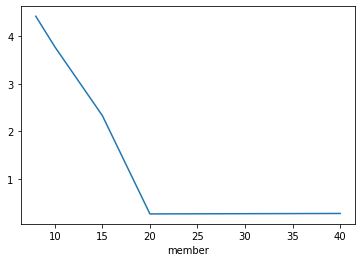

In [50]:
plt.plot(A,RMSE)
plt.xlabel("member")
plt.savefig("MLEF_mem1.png")
plt.show()

In [32]:
np.array(RMSE).reshape(5,10)

array([[4.27822412, 0.26973599, 0.36869634, 0.44730928, 0.51259007,
        0.56585024, 0.61039624, 0.64840825, 0.68107328, 0.70954382],
       [4.35430709, 0.25896839, 0.32986779, 0.38420877, 0.42552094,
        0.45930138, 0.48738081, 0.5154437 , 0.53326184, 0.55577237],
       [4.42459836, 1.01847779, 0.49519468, 0.41705713, 0.44473819,
        0.59930519, 0.53680493, 0.59121266, 0.56581403, 0.66941378],
       [4.63100036, 3.75365116, 3.85005242, 3.77007518, 3.46270056,
        3.26678619, 3.34656222, 3.60739891, 3.14875117, 3.12045692],
       [4.609564  , 4.10421041, 4.02283321, 3.94941303, 4.0190978 ,
        4.19248598, 3.93352768, 4.11728933, 4.04203726, 3.99662452]])

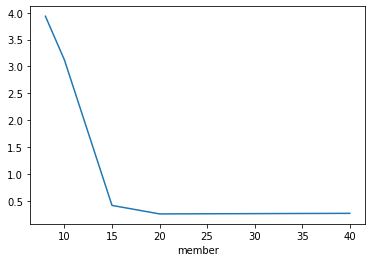

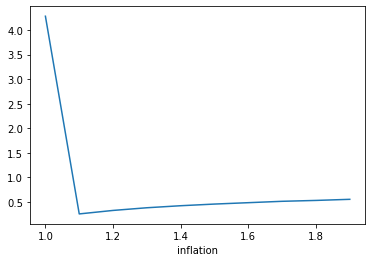

In [34]:
B = B[:10]
score = np.array(RMSE).reshape(5,10)
C1 = np.min(score,axis=1)
C2 = np.min(score,axis=0)
plt.plot(A,C1)
plt.xlabel("member")
plt.show()
plt.plot(B,C2)
plt.xlabel("inflation")
plt.show()

## EnKF
switch: 1=ETKF, 2=PO, 3=EnSRF, 4=LETKF 

In [64]:
def Forecast_EnKF(Xa_,Xa,m,b,h,F,switch):
    #h = 0.05 
    #F = 8.0
    
    #control
    Xf_ = Rungekutta4(Xa_,h,F)
    
    #ensemble
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    
    #Pf^(1/2)
    dXf = Xf - Xf_.reshape(-1,1)
    if(switch != 4):
        dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T
    #Pf = Pf*L
    
    return Xf_,Xf,Pf,dXf

def Analysis_EnKF(Xf,Pf,dXf,Xf_,y,m,N,a,mask,L,rho,switch):
    #N = 40
    p = N-a
    H = np.identity(N)
    H = np.delete(H,mask,axis=0) #観測欠損 #観測行列
    #E = np.identity(N)
    #H = H3_t(Xf_,E,mask)
    R = np.eye(p)
    
    if(switch==1):
    ## ETKF
        dY = H @ dXf
        #カルマンゲインの導出
        A = H @ Pf @ H.T + R
        A_inv = np.linalg.inv(A)
        K = Pf @ H.T @ A_inv
        # K-localization
        K = K*L
    
        Xa_ = Xf_ + K @ (y - H @ Xf_)
        E = np.eye(m)
        TT = E - dY.T @ np.linalg.inv(dY @ dY.T+(m-1)*R) @ dY
        #print(TT)
    
        la,v = np.linalg.eigh(TT)
        #print(v)
        D = np.diag(np.sqrt(la))
        #print(D)
        U = np.array(v).reshape(m,m)
    
        T = U @ D
        #print(T @ T.T)
        dXa = dXf @ T
        Xa = np.zeros((N,m))
        Xa = dXa + Xa_.reshape(-1,1)
    
        Pa = dXa @ dXa.T/(m-1)
        
    if(switch==2):
    ## PO
        I = np.eye(N)
        mu = np.zeros(N-a)
        sigma2 = np.eye(N-a)
        EO = multivariate_normal(mu,sigma2,m).T
        Y = np.zeros((p,m))
        Y = y.reshape(-1,1) + EO
        #dY = H @ dXf
        #カルマンゲインの導出
        K = Pf @ H.T @ np.linalg.inv(H @ Pf @ H.T + R)
        K = K*L        #K-localization
    
        Xa = Xf + K @ (Y - H @ Xf)
        Xa_ = Xf_ + K @ (y - H @ Xf_)
        Pa = (I - K @ H)@ Pf
    
    if(switch==3):
    ## EnSRF
        I = np.eye(N)
        P0 = Pf
        dX0 = dXf
        X0_ = Xf_
        for i in range(p):
            H_ = np.reshape(H[i],(1,-1))
            #V1 = (H_ @ Z0).T
            D1 = H_ @ P0 @ H_.T+R[i,i]
            #print(D1)
            K1 = P0 @ H_.T @ np.linalg.inv(D1)
            K1_ = K1/(1+np.sqrt(R[i,i]/D1))
            K1_ = K1_.reshape(-1,1)*L[:,i].reshape(-1,1)
            Xa_ = X0_+K1 @ (y[i]-H_@X0_) 
            dXa = (I - K1_ @ H_) @ dX0
            Pa = dXa@dXa.T/(m-1)
                    
            X0_ = Xa_
            dX0 = dXa
            P0 = Pa
        
        Xa = np.zeros((N,m))
        Xa = dXa + Xa_.reshape(-1,1)
    
    if(switch==4):
    ## LETKF
        sigma=7.5
        obs=np.arange(N)
        obs=np.delete(obs,mask)
        D = np.zeros((N,p))
        for s in range(N):
            for u in range(p):
                D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
        #print(obs)
        Xa = np.zeros((N,m))
        Xa_ = np.zeros(N)
        dXa = np.zeros((N,m))
        I = np.eye(m)
        #使う値は前後10点に限定
        for i in range(N):
            d = D[i]
            far = np.arange(p)
            far = far[d>2*np.sqrt(10/3)*sigma]
            yi = y
            Hi = H
            Ri = R
            yi = np.delete(yi,far)
            Hi = np.delete(Hi,far,axis=0)
            Ri = np.delete(Ri,far,axis=0)
            Ri = np.delete(Ri,far,axis=1)
            #print(yi.shape,Hi.shape,Ri.shape)
            diagR = np.diag(Ri)
            di = yi - Hi @ Xf_
            dYi = Hi @ dXf
            Li = np.exp(-d**2/(2*sigma**2))
            Li = np.delete(Li,far)
            Ri = np.diag(diagR/Li)
            R_inv = np.linalg.inv(Ri)
    
            A = (m-1)*I/rho + dYi.T @ R_inv @ dYi
            la,v = np.linalg.eigh(A) #eigenvalue decomposition
            D_inv = np.linalg.inv(np.diag(la))
            U = np.array(v).reshape(m,m)
            Pa_ = U @ D_inv @ U.T #UD^(-1)UT
            #print(Pa_)
        
            Xa_[i] = Xf_[i] + dXf[i,:] @ Pa_ @ dYi.T @ R_inv @ di 
            Pa_root = U @ np.sqrt(D_inv) @ U.T
            Pa_root = Pa_root * np.sqrt(m-1)
            dXa[i,:] = dXf[i,:] @ Pa_root
            Xa[i,:] = np.full(m,Xa_[i]) + dXa[i,:]
            
        #print("Xa_",Xa_)
        #print("dXa",dXa)
        #print("Xa",Xa)
        Pa = dXa @ dXa.T/(m-1)
    
    return Xa,Pa,Xa_

def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = np.delete(H,mask,axis=0)
    #Ht = H[mask]
    return Ht@dX

def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = np.delete(H,mask,axis=0).T
    return Hadj@dY

ETKF
40
20
15
10
8


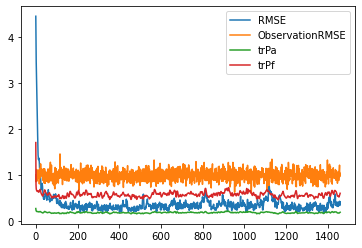

0.3571157292567874


In [76]:
t = 1460
N = 40
h = 0.05 
F = 8.0
#m = 20
dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE2 = []
TrPa = []
TrPf = []
A = []
B = []
method = ['ETKF','PO','EnSRF','LETKF']
for switch in [1,2,3,4]:
#switch = 1
    print(method[switch-1])
    RMS = []
    for m in [40,20,15,10,8]:
        #初期値
        X0 = np.random.rand(N)
        for j in range(500):
            X1 = Rungekutta4(X0,h,F)
            X0 = X1
        Xa_ = X1

        Xa = np.empty((N,m))
        Xc = np.random.rand(N,m)#*5.0
        Xa = Xa_.reshape(-1,1) + Xc
        #plt.plot(Xa[:,9])
        #plt.plot(Xa[:,8])
        #plt.show()

#for i in range(20):
        a = 0 # observation miss
        sigma = 2.0
        #for j in range(1):
        b = 1.05
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        for k in range(t):
            mask = np.random.choice(40,a,replace=False)
            y_ =np.delete(Y[k],mask)
            D=np.zeros((N,N-a))
            L=np.zeros((N,N-a))
            r=0
            obs=np.arange(N)
            obs=np.delete(obs,mask)
            for s in range(N):
                for u in range(N-a):
                    D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
            d0 = 2*np.sqrt(10/3)*sigma
            r0 = np.exp(-d0**2/(2*sigma**2))
            L = np.exp(-D**2/(2*sigma**2))
            L[L<r0]=0
           
            (Xf_,Xf,Pf,dXf) = Forecast_EnKF(Xa_,Xa,m,b,h,F,switch)
            (Xa,Pa,Xa_) = Analysis_EnKF(Xf,Pf,dXf,Xf_,y_,m,N,a,mask,L,b,switch)
            #print(Xf)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k]
            #Y1 = Y[k]
            Y1 =np.delete(Y[k],mask)
            rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
            rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
            rmse_ = np.sqrt(np.sum((Xa_-X1)*(Xa_-X1))/N) 
            #X1 = H3(Xt[k],mask)
            rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/N)
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
             #   print(k)
        rb = np.mean(np.array(R_[500:]))
        trPab = np.mean(np.array(trPa[500:]))
        trPfb = np.mean(np.array(trPf[500:]))
        RMS.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        #A.append(sigma)
        A.append(m)
        B.append(b)
        print(m)
    RMSE2.append(RMS)
#print(trPa)
#print(R)
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("ETKF-KL_obs2.png")
plt.show()
print(np.mean(R_[500:]))

In [68]:
RMSE2

[[0.6079007520270139,
  0.5081206993733954,
  0.4394837649465055,
  0.36365398442024577,
  0.3503902435862551]]

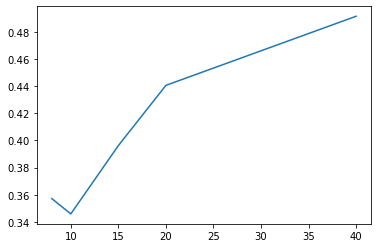

In [77]:
plt.plot(A,RMS)
plt.show()

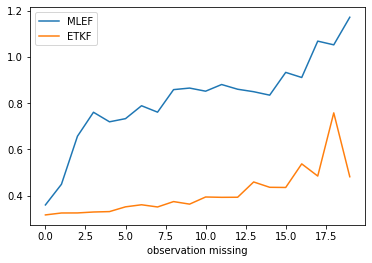

In [39]:
plt.plot(A,RMSE,label="MLEF")
plt.plot(A,RMSE2,label="ETKF")
plt.xlabel("observation missing")
plt.legend()
plt.savefig("MLEF-ETKF-obsmiss_obs2.png")
plt.show()

## MLEF(preconditioning)

In [28]:
def Forecast(Xac,Xa,m,b,h,F):
    #h = 0.05 
    #F = 8.0
    
    #control
    Xfc = Rungekutta4(Xac,h,F)
    
    #ensemble
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    
    #Pf^(1/2)
    dXf = Xf - Xfc.reshape(-1,1)
    dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T
    #Pf = Pf*L
    
    return Xfc,Xf,Pf,dXf

def Analysis(Xfc,Xf,dXf,y,m,a,mask):
    N = 40
    p = N-a
    R = np.eye(p)
    I = np.eye(m)
    
    R_inv = np.linalg.inv(R)
    R_sqrt = np.sqrt(R_inv)
    #z = R_sqrt@H(Xf,mask) - R_sqrt@H(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z = R_sqrt@H3(Xf,mask) - R_sqrt@H3(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C = z.T@z
    #print(C)
    
    la,v = np.linalg.eigh(C)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C)^(-T/2)
    D_inv = np.diag(np.sqrt(np.ones(m)+la))
    A_inv = V @ D_inv @ V.T #(I+C)^(1/2)
    
    v0 = np.zeros(m) #v=(I+C)^(-1)@zeta 
    args = (Xfc,dXf,A,y,R_inv,mask,H3)
    res = optimize.minimize(J, v0, args=args, method='BFGS', jac=jacobi, options={'gtol':1e-4, 'disp':True})
    v = res.x
    jmin = res.fun
    #Pa_ = res.hess_inv #(I+C)^(-T/2)?
    #v,jmin = CG(v0,*args)
    #zeta = A_inv@v
    Xac = Xfc + dXf@v
    
    Xf = Xac.reshape(-1,1)+dXf
    #z_opt = R_sqrt@H(Xf,mask)- R_sqrt@H(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z_opt = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z_opt = R_sqrt@H3(Xf,mask) - R_sqrt@H3(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C_opt = z_opt.T@z_opt
    
    la,v = np.linalg.eigh(C_opt)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C_opt)^(-T/2)
    #print(A)
    
    dXa = dXf@A #Pf^(1/2)(I+C_opt)^(-T/2)
    
    Xa = np.zeros((N,m))
    Xa = dXa + Xac.reshape(-1,1)
    Pa = dXa@dXa.T
    
    return Xa,Pa,Xac,jmin

def J(v,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
     
    x = xb + dXf@v
    inv = y - H_obs(x,mask)   
    return (v.T@v + inv.T@R_inv@inv)/2

def jacobi(v,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    R_sqrt = np.sqrt(R_inv)
    
    x = xb + dXf@v
    z = R_sqrt@H_obs(x.reshape(-1,1)+dXf,mask) - R_sqrt@H_obs(x,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    inv = y - H_obs(x,mask)
    djo = z.T@R_sqrt@inv
    return v - djo

def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo**2

def H3(x,mask):
    xo = np.delete(x,mask,axis=0)
    return np.sqrt(xo**2)

         Current function value: 153.399502
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 79.539529
         Iterations: 9
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 69.249464
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 82.485078
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 100.147588
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 112.439352
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12

Optimization terminated successfully.
         Current function value: 64.970588
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 96.778251
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 74.966914
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 58.915869
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 76.084680
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 78.432572
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
 

         Current function value: 56.942821
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 92.412256
         Iterations: 10
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 50.716179
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 36.093419
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 50.178104
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 49.008031
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 57.668617
         Iterations: 10
         Function evaluations: 82
         Gradi

         Current function value: 83.758540
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 76.613052
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 62.216190
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 69.696267
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 73.294036
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 69.598406
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
O

         Current function value: 40.088496
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 74.153718
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 60.345155
         Iterations: 12
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 87.669755
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 116.191488
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 133.146359
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 134.090558
         Iterations: 12
         

Optimization terminated successfully.
         Current function value: 175.031015
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 198.138993
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 206.519949
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 190.295453
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 188.638351
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 204.512900
         Iterations: 12
         Function evaluations: 14
         Gradient evaluation

         Current function value: 97.387690
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 145.602362
         Iterations: 12
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 107.812581
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 117.887269
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 66.369518
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 76.086713
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 77.984910
         Iterations: 9
         

         Current function value: 93.632495
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 133.878405
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 116.421815
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 159.743833
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 118.706023
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 117.687501
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 121.992755
         Iterations: 9
       

Optimization terminated successfully.
         Current function value: 30.559757
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 27.948269
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 23.076123
         Iterations: 5
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 23.244008
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 23.021238
         Iterations: 10
         Function evaluations: 81
         Gradient evaluations: 70
         Current function value: 25.075413
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 19.418715
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current f

         Current function value: 17.523582
         Iterations: 10
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 18.595325
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 19.680783
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 19.039854
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 16.413473
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.575236
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 18.793147
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization termina

         Current function value: 24.392273
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 23.655515
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 21.451715
         Iterations: 7
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 23.103710
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 20.974384
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 16.652747
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 18.22230

         Current function value: 22.963772
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.273080
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 20.825296
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 8.231608
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.209626
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.643634
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 7.600449
         Iterations: 2
         Function evaluations: 105
         Gradient evaluations: 93
         Current funct

         Current function value: 19.422850
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.395951
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 20.579315
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 18.728466
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.034728
         Iterations: 9
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 16.896837
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 18.562392
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminat

         Current function value: 23.044034
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 15.197118
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 23.355732
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 21.150758
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.564190
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 17.687134
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 26.814586
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current fun

         Current function value: 13.540023
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 21.031321
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 15.266483
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 14.917673
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.223338
         Iterations: 5
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 23.615288
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 21.165832
         Iterations: 10
         Function evaluations: 110
         Gr

         Current function value: 22.130541
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 16.629776
         Iterations: 8
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 18.916426
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 16.851437
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 19.947846
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 23.994925
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.930621
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current funct

         Current function value: 12.041578
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 26.891771
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 28.037080
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 23.583423
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 17.568586
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.480676
         Iterations: 6
         Function evaluations: 69
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 18.802930
         Iterations: 10
         Function evaluations: 11
         Gradient 

         Current function value: 15.452889
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 28.070071
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 16.662831
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: 23.642173
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 16.451955
         Iterations: 9
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 26.042335
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.557521
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
         Current fun

         Current function value: 22.850530
         Iterations: 3
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 12.040075
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.798269
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 21.382231
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.926919
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 16.371528
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 18.411370
         Iterations: 9
         F

         Current function value: 21.550487
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 18.322492
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 32
         Current function value: 21.110127
         Iterations: 8
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 17.829913
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 73
         Current function value: 21.423698
         Iterations: 10
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 24.478912
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 20.253703
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 27.020833
         Iterat

Optimization terminated successfully.
         Current function value: 13.180444
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 15.719151
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.904081
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.219460
         Iterations: 9
         Function evaluations: 70
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 25.501919
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 16.051738
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 19.106992
         Iterations: 4
         Function evaluations: 104
         Gradie

         Current function value: 17.705633
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 19.740793
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 17.965708
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.378831
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 15.286575
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.619668
         Iterations: 11
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 20.105230
         Iterations: 6
         Function evaluations: 95
         Gradient

         Current function value: 13.274777
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.387130
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.772979
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 20.601009
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.186365
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 21.433679
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 19.385253
         Iterations: 11
         Function evaluations: 12
         Gradient

         Current function value: 14.184351
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 15.202540
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 17.932483
         Iterations: 9
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 21.959772
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.559087
         Iterations: 5
         Function evaluations: 59
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 21.127913
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 14.937453
         Iterations: 9
         Function evaluations: 50
         Gradient evaluations: 39
Optimization termin

         Current function value: 14.551134
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.787562
         Iterations: 8
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.466283
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 19.400940
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.298999
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 20.726339
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 9.588038
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminat

         Current function value: 12.083540
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 12.906563
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 17.010176
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 18.872323
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 20.304961
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 25.451372
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 19.340753
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
         Current funct

         Current function value: 16.404261
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.170148
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 22.297028
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 16.546457
         Iterations: 4
         Function evaluations: 68
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 19.415594
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.242392
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 10.639463
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
         Current functio

         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 15.515409
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 12.561075
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 17.315088
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 19.393067
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.186325
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 18.763637
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 16.595230
         Iterations: 8
         Function evaluations: 91
         Gradient eva

         Current function value: 17.963394
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.818685
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.710375
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 14.830563
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 21.947941
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.500788
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 11.294555
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current funct

         Current function value: 21.592314
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 28.674810
         Iterations: 8
         Function evaluations: 137
         Gradient evaluations: 125
         Current function value: 22.249207
         Iterations: 13
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 13.762664
         Iterations: 6
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 26.978308
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 18.150954
         Iterations: 6
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 26.862664
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 20.490125
         I

         Current function value: 14.857836
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 17.334924
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.910183
         Iterations: 12
         Function evaluations: 71
         Gradient evaluations: 60
         Current function value: 23.240064
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 18.917688
         Iterations: 4
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 15.568287
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 20.679121
         Iterations: 9
         Function evaluations: 10
         Gradient

         Current function value: 19.486891
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 13.232107
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 12.532255
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.132818
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 22.966921
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.753486
         Iterations: 3
         Function evaluations: 50
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 12.244152

         Current function value: 19.035867
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.564458
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 15.367324
         Iterations: 8
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 16.651432
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 25.715825
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 20.626345
         Iterations: 10
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 13.512556
         Iterations: 9
         Function evaluations: 11
         Gradient

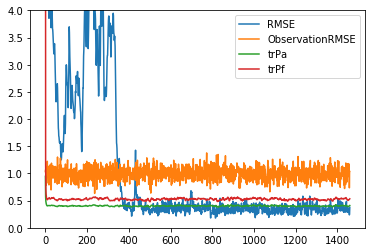

rmse 0.3509193463295585
trPa 0.4027611198064501
trPf 0.5272535311119946
<Jmin> 36.68399554187806


In [33]:

t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0

#初期値
X0 = np.random.rand(N)
for j in range(500):
    X1 = Rungekutta4(X0,h,F)
    X0 = X1
Xac = X1

Xa = np.empty((N,m))
Xc = np.random.rand(N,m)*5.0
Xa = Xac.reshape(-1,1) + Xc
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data2.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
Jmin = []
a = 0 # observation miss
b = 1.2 # inflation
trPa = []
trPf = []
R = []
Rf = []
R_ = []
RO = []
for k in range(t):
    mask = np.random.choice(40,a,replace=False)
    y_ =np.delete(Y[k],mask)
    
    (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b)
    (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,a,mask)
    #print(Xf)
    Jmin.append(jmin)
    
    rmse=np.zeros(m)
    rmsef = np.zeros(m)
    rmse_=0.0
    X1 = Xt[k]
    rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
    rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
    rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
    Y1 = y_
    #X1 = H(Xt[k],mask)
    #X1 = H2(Xt[k],mask)
    X1 = H3(Xt[k],mask)
    rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
    err = np.sqrt(np.sum(np.diag(Pa))/N)
    err2 = np.sqrt(np.sum(np.diag(Pf))/N)
    trPa.append(abs(err))
    trPf.append(abs(err2))
    R.append(rmse)
    Rf.append(rmsef)
    R_.append(rmse_)
    RO.append(rmseo)
    #if(k%100==0):
    #   print(k)
rb = np.sum(np.array(R_[500:]))/(t-500)
trPab = np.sum(np.array(trPa[500:]))/(t-500)
trPfb = np.sum(np.array(trPf[500:]))/(t-500)
RMSE.append(rb)
TrPa.append(trPab)
TrPf.append(trPfb)
plt.ylim([0.0,4.0])
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
plt.savefig("MLEF_obs2.png")
plt.show()
print("rmse",np.mean(R_[500:]))
print("trPa",np.mean(trPa[500:]))
print("trPf",np.mean(trPf[500:]))
print("<Jmin>",np.mean(np.array(Jmin)))